#  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [2]:
df= pd.read_csv(r"C:\Users\shivani\Downloads\Country-data.csv")

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# To check Statistical Summary

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# To check Outliers

In [6]:
columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
def box_plot(columns):
    cols= columns
    
    
    fig,axes=plt.subplots(3,3,figsize=(15,7))
    axes= axes.flatten()
    
    for i,j in enumerate(cols):
        sns.boxplot(x=df[j],ax=axes[i])
        axes[i].set_title(f"{j} skewness {df[j].skew().round(2)}")
    
    plt.tight_layout()
    plt.show()

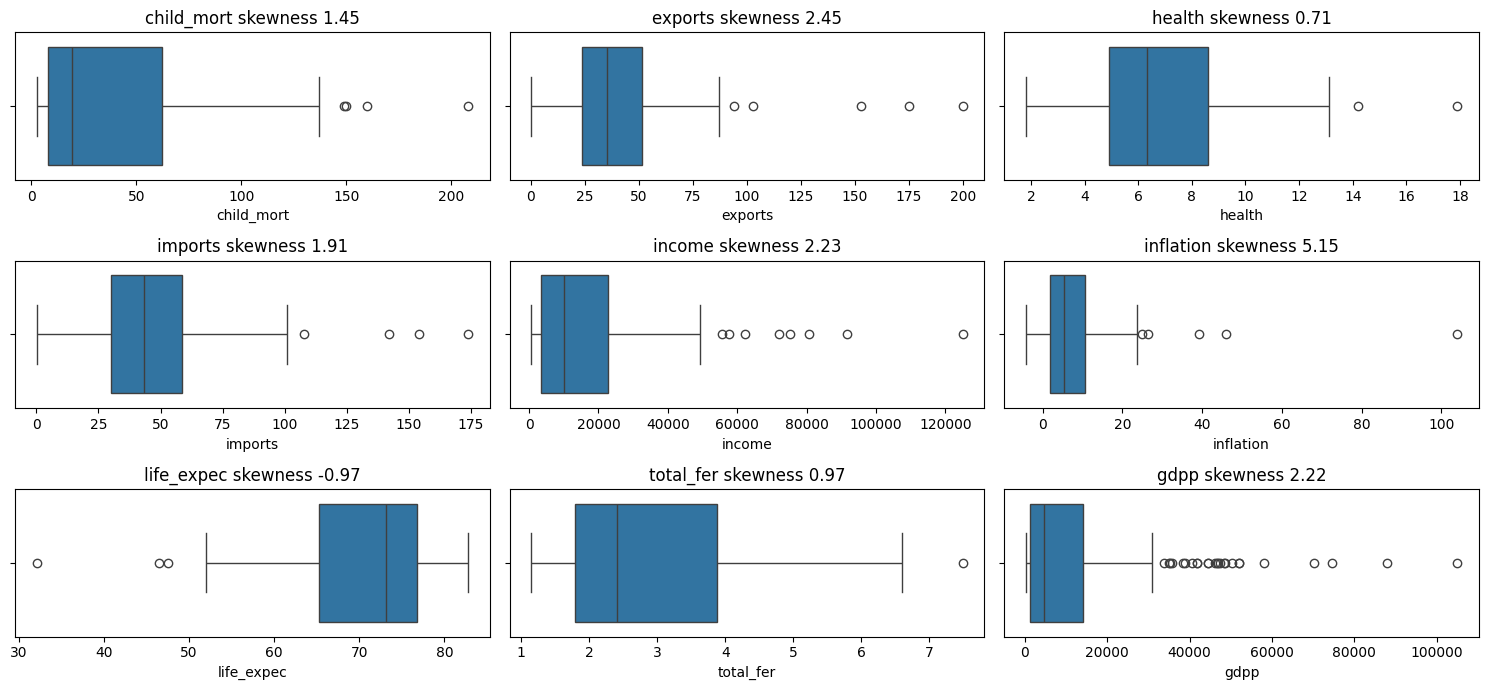

In [7]:
box_plot(columns)

In [8]:
x= df.drop('country',axis=1)

In [9]:
x.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#  To check correlation

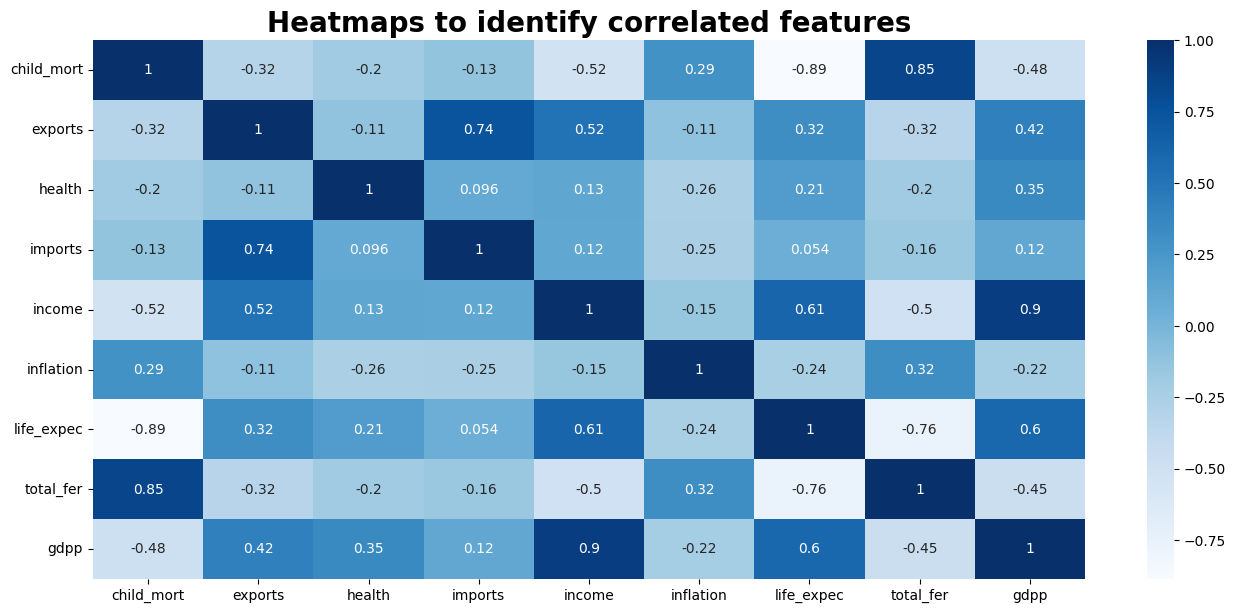

In [9]:
d = x.corr()
plt.figure(figsize=(16,7))
sns.heatmap(d,annot=True,cmap='Blues')
plt.title('Heatmaps to identify correlated features', size=20,fontweight='bold')
plt.show()

#  Top 10 countries child Mort

In [8]:
top_10= df.sort_values("child_mort",ascending=False)

In [9]:
top_10.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334


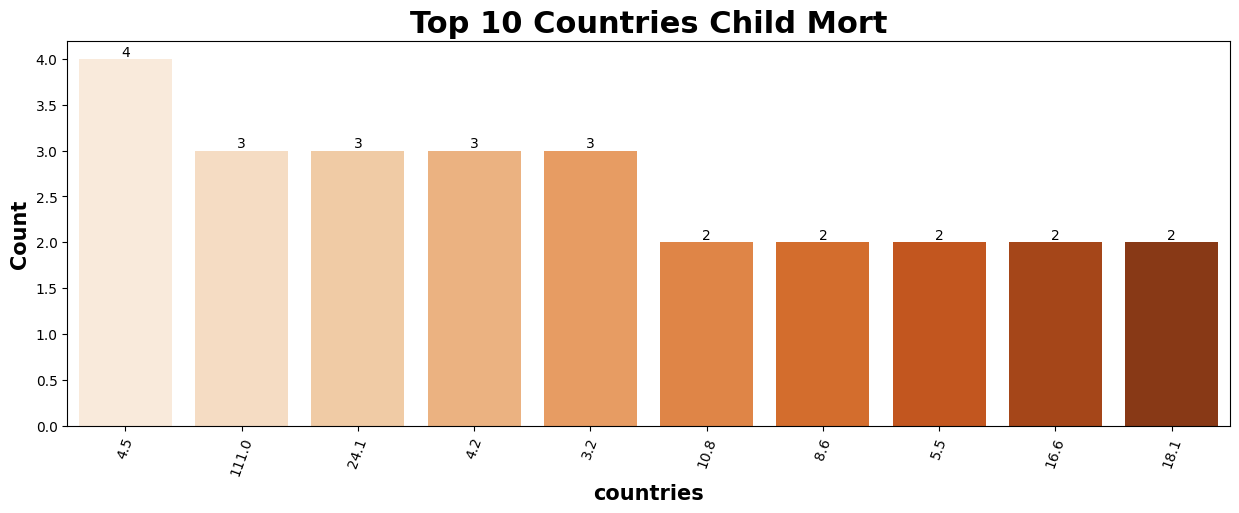

In [16]:
plt.figure(figsize=(15,5))
top_10_castes = df['child_mort'].value_counts().nlargest(10).index
df_top_10 = df[df['child_mort'].isin(top_10_castes)]

ax=sns.countplot(x='child_mort',data=df_top_10, order=top_10_castes,palette='Oranges')
plt.xticks(rotation=70)
plt.title('Top 10 Countries Child Mort',fontsize=22,fontweight='bold')
plt.xlabel('countries',fontweight='bold',fontsize=15)
plt.ylabel('Count',fontweight='bold',fontsize=15)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Data Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
mn= MinMaxScaler()

In [12]:
x= mn.fit_transform(x)

In [13]:
x

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

# Using PCA to reduce dimensionality

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca= PCA(n_components=2)

In [16]:
pca1= pca.fit_transform(x)

In [17]:
pca1

array([[ 0.59907764,  0.09549001],
       [-0.1584743 , -0.2120924 ],
       [-0.00368552, -0.13586725],
       [ 0.65023499,  0.27597526],
       [-0.20071124, -0.06466223],
       [-0.112534  , -0.20604633],
       [-0.08748612, -0.24430696],
       [-0.44078359,  0.01628159],
       [-0.52052639,  0.11505267],
       [-0.03880915, -0.12198813],
       [-0.25330504, -0.03709248],
       [-0.28004875,  0.08194452],
       [ 0.10721304, -0.24817007],
       [-0.23240595, -0.10625665],
       [-0.18238383, -0.10352266],
       [-0.49552529,  0.24168217],
       [-0.0343959 , -0.05258709],
       [ 0.57211533,  0.08891622],
       [ 0.0072184 , -0.06228781],
       [ 0.12086723, -0.09859734],
       [-0.25999884, -0.22215393],
       [ 0.15372061,  0.02940304],
       [-0.13962489, -0.26315962],
       [-0.42041602,  0.19485164],
       [-0.20775216, -0.12550836],
       [ 0.65389251,  0.11320578],
       [ 0.60975439,  0.11313395],
       [ 0.1091356 , -0.03051148],
       [ 0.57452028,

In [18]:
pca.explained_variance_ratio_

array([0.55001227, 0.13384784])

In [19]:
pca.singular_values_

array([4.85178527, 2.39343183])

In [20]:
df_tf = pd.DataFrame(data=pca1, columns=["PCA 1", "PCA 2"])

In [21]:
df_tf.head()

,PCA 1,PCA 2
0,0.599078,0.095490
1,-0.158474,-0.212092
2,-0.003686,-0.135867
3,0.650235,0.275975
4,-0.200711,-0.064662


In [24]:
df=pd.concat([df,df_tf],axis=1)

In [25]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PCA 1,PCA 2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.599078,0.095490
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.158474,-0.212092
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.003686,-0.135867
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0.650235,0.275975
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-0.200711,-0.064662


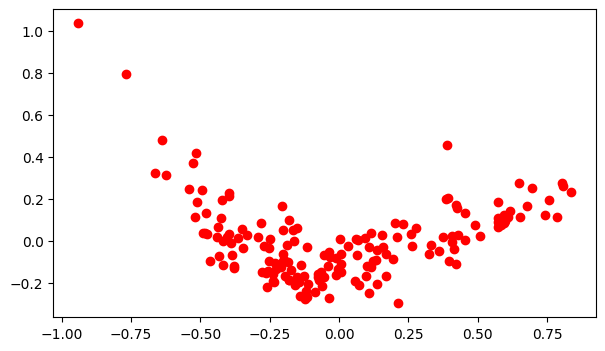

In [26]:
plt.figure(figsize=(7,4))
plt.scatter(x='PCA 1',y='PCA 2',data=df,color='red')
plt.show()

# Using KMean clustering

In [27]:
from sklearn.cluster import KMeans

In [28]:
wcss=[]

for i in range(1,15):
    kmean= KMeans(i)
    kmean.fit(pca1)
    wcss_inertia= kmean.inertia_
    wcss.append(wcss_inertia)

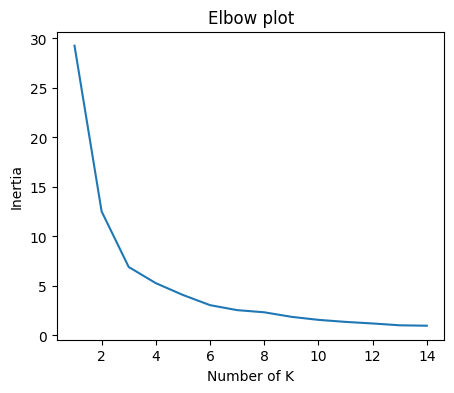

In [26]:
cluster_num= range(1,15)
plt.figure(figsize=(5,4))
plt.plot(cluster_num,wcss)
plt.title('Elbow plot')
plt.xlabel('Number of K')
plt.ylabel('Inertia')
plt.show()

In [29]:
km= KMeans(n_clusters=4,random_state=15)

In [30]:
y_predicted= km.fit_predict(df[['PCA 1','PCA 2']])

In [31]:
y_predicted 

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3,
       3, 0, 0, 0, 0, 1, 1, 3, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 3, 3, 0, 0, 0, 0, 2, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 3, 0, 1,
       1, 0, 3, 2, 0, 1, 1, 3, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 2, 3, 1, 3, 0, 0, 0, 3, 3, 2, 0, 0, 1, 0, 0, 1, 0, 3,
       1, 2, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 3, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [32]:
df['Clusters']= y_predicted

In [33]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PCA 1,PCA 2,Clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.599078,0.095490,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.158474,-0.212092,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.003686,-0.135867,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0.650235,0.275975,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-0.200711,-0.064662,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0.160078,-0.029625,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.061133,-0.171339,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,-0.115512,-0.032034,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0.332968,-0.019824,1


In [34]:
km.cluster_centers_

array([[-0.04772179, -0.12810137],
       [ 0.50893005,  0.09961071],
       [-0.6683559 ,  0.53465046],
       [-0.37426935,  0.03873509]])

#  Plot a cluster data with centroid

In [35]:
df0=df[df['Clusters']==0]
df1= df[df['Clusters']==1]
df2= df[df['Clusters']==2]
df3= df[df['Clusters']==3]

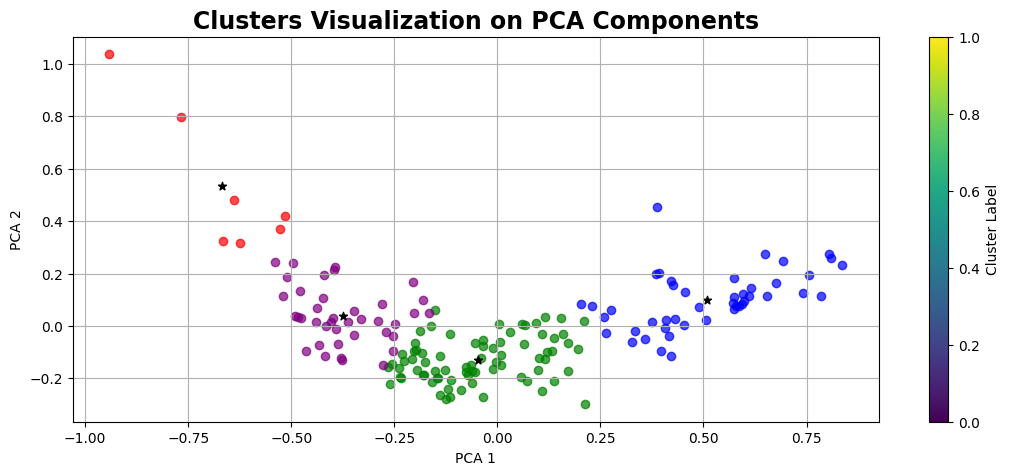

In [36]:
plt.figure(figsize=(13,5))
plt.scatter(x='PCA 1',y='PCA 2',data=df0,color='green',alpha=0.7)
plt.scatter(x='PCA 1',y='PCA 2',data=df1,color='blue',alpha=0.7)
plt.scatter(x='PCA 1',y='PCA 2',data=df2,color='red',alpha=0.7)
plt.scatter(x='PCA 1',y='PCA 2',data=df3,color='purple',alpha=0.7)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.title('Clusters Visualization on PCA Components', fontweight='bold',size=17)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [37]:
from sklearn.metrics import silhouette_score

In [38]:
x_pca = df[['PCA 1', 'PCA 2']].values
labels = df['Clusters'].values

In [39]:
score= silhouette_score(x_pca,labels)

In [40]:
score

np.float64(0.469731643810603)

In [41]:
cluster_profiles= df.groupby('Clusters').mean(numeric_only=True)
print(cluster_profiles)

          child_mort     exports    health    imports        income  \
Clusters                                                              
0          24.460526   36.518276  6.274868  44.311393  11034.078947   
1          94.537778   29.062444  6.292444  43.502222   3312.733333   
2           4.757143  113.857143  7.480000  94.585714  68657.142857   
3           6.271795   50.897436  8.354103  47.264103  35766.666667   

          inflation  life_expec  total_fer          gdpp     PCA 1     PCA 2  
Clusters                                                                      
0          8.360276   72.165789   2.377368   5563.842105 -0.047722 -0.128101  
1         11.997000   59.220000   5.102000   1633.600000  0.508930  0.099611  
2          2.490143   81.057143   1.675714  64871.428571 -0.668356  0.534650  
3          2.740744   78.612821   1.802821  31142.307692 -0.374269  0.038735  


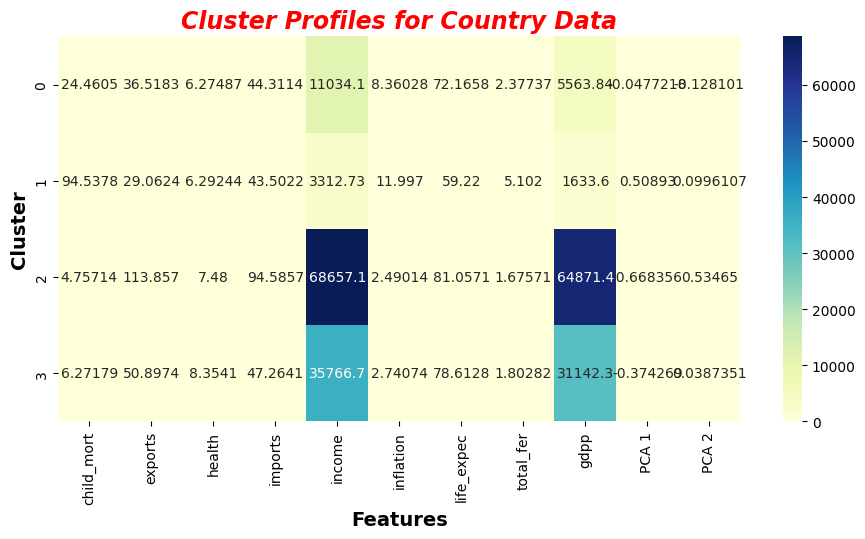

In [42]:
plt.figure(figsize=(11, 5))
sns.heatmap(cluster_profiles, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Cluster Profiles for Country Data',fontweight='bold',color='red',fontsize=17,fontstyle='italic')
plt.xlabel("Features",fontweight='bold',fontsize=14)
plt.ylabel('Cluster',fontweight='bold',fontsize=14)
plt.show()  

# Analysis and Recommendation

Based on these clusters, Cluster 1 represents countries with the most dire socio-economic and health conditions. They have high child mortality, low income, low life expectancy, high fertility rates, and very low GDP per capita. These indicators suggest that countries in Cluster 1 are in urgent need of aid and development assistance.

Cluster 0 shows moderate development, while Cluster 2 and Cluster 3 include countries with better socio-economic conditions and are less likely to need immediate aid.

# Conclusion


The CEO should prioritize aid towards countries in Cluster 1, as they show the most significant need for socio-economic and health improvements.

# Countries in Cluster1

In [43]:
cluster_1_countries = df[df['Clusters'] == 1]

In [44]:
cluster_1_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PCA 1,PCA 2,Clusters
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0.599078,0.095490,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0.650235,0.275975,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0.572115,0.088916,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0.653893,0.113206,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0.609754,0.113134,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0.574520,0.063665,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0.785832,0.114026,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0.803484,0.275148,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0.429681,0.026628,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0.693962,0.249037,1


In [45]:
cluster_1_country_names = df[df['Clusters'] == 1]['country'].tolist()

In [46]:
cluster_1_country_names

['Afghanistan',
 'Angola',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']